In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../data/musicbrainz_artists.csv")
df.head()

,artist_name,artist_id,country,begin_date,end_date,type,gender,disambiguation
0,Rhonda Vincent And The Rage,b6310fcc-30ea-41a9-9cda-1931f569d76f,US,NaN,NaN,Group,NaN,NaN
1,Yolanda Kondonassis,73e9c3b8-ef39-48e5-8b08-f746dcf0c765,US,1963,NaN,Person,female,harpist
2,John Hartford,3178cc4c-cd9f-4842-96fb-28bf9cfec591,US,1937-12-30,2001-06-04,Person,male,NaN
3,Sheryl Crow,80ccfede-c258-4575-a7ad-c982e9932e0f,US,1962-02-11,NaN,Person,female,American singer-songwriter and musician
4,Neal Hefti,75770f14-cbe0-4b06-8825-14797098ff2a,US,1922-10-29,2008-10-11,Person,male,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   artist_name     2964 non-null   object
 1   artist_id       2964 non-null   object
 2   country         2577 non-null   object
 3   begin_date      2532 non-null   object
 4   end_date        821 non-null    object
 5   type            2923 non-null   object
 6   gender          2016 non-null   object
 7   disambiguation  1189 non-null   object
dtypes: object(8)
memory usage: 185.4+ KB


In [6]:
df.isnull().sum()

artist_name          0
artist_id            0
country            387
begin_date         432
end_date          2143
type                41
gender             948
disambiguation    1775
dtype: int64

In [7]:
df['country'] = df['country'].fillna('Unknown')

In [8]:
df['begin_date'] = df['begin_date'].fillna('Unknown')

In [9]:
df['end_date'] = df['end_date'].fillna('Active')

In [10]:
df['type'] = df['type'].fillna('Unknown')

In [11]:
df['gender'] = df.apply(lambda row: 'N/A' if row['type'] == 'Group' else row['gender'], axis=1)
df['gender'] = df['gender'].fillna('Unknown')

In [12]:
df.isnull().sum()

artist_name          0
artist_id            0
country              0
begin_date           0
end_date             0
type                 0
gender               0
disambiguation    1775
dtype: int64

In [13]:
df = df.drop(columns= ['artist_id', 'disambiguation'])

In [14]:
df.head()

,artist_name,country,begin_date,end_date,type,gender
0,Rhonda Vincent And The Rage,US,Unknown,Active,Group,N/A
1,Yolanda Kondonassis,US,1963,Active,Person,female
2,John Hartford,US,1937-12-30,2001-06-04,Person,male
3,Sheryl Crow,US,1962-02-11,Active,Person,female
4,Neal Hefti,US,1922-10-29,2008-10-11,Person,male


In [15]:
duplicados = df.duplicated()

print(df[duplicados])

Empty DataFrame
Columns: [artist_name, country, begin_date, end_date, type, gender]
Index: []


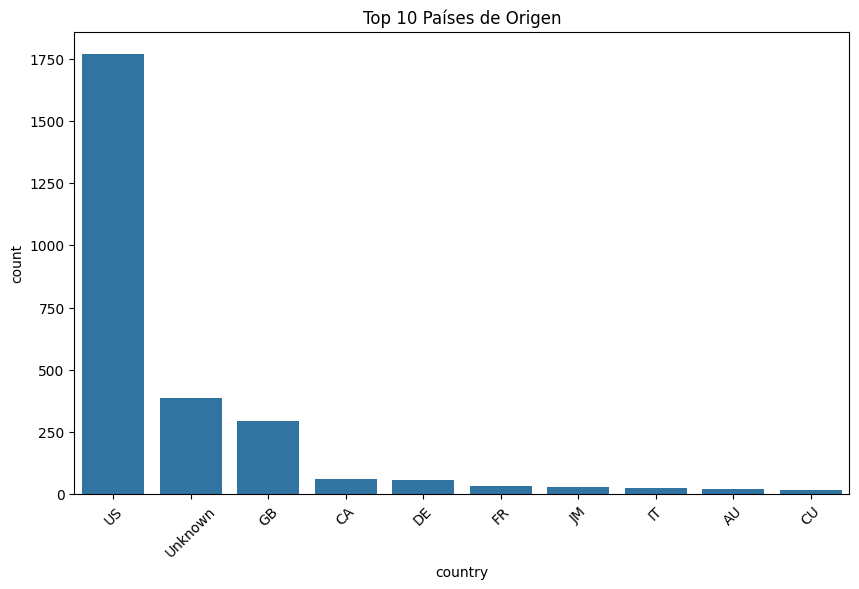

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:10])
plt.title('Top 10 Países de Origen')
plt.xticks(rotation=45)
plt.show()

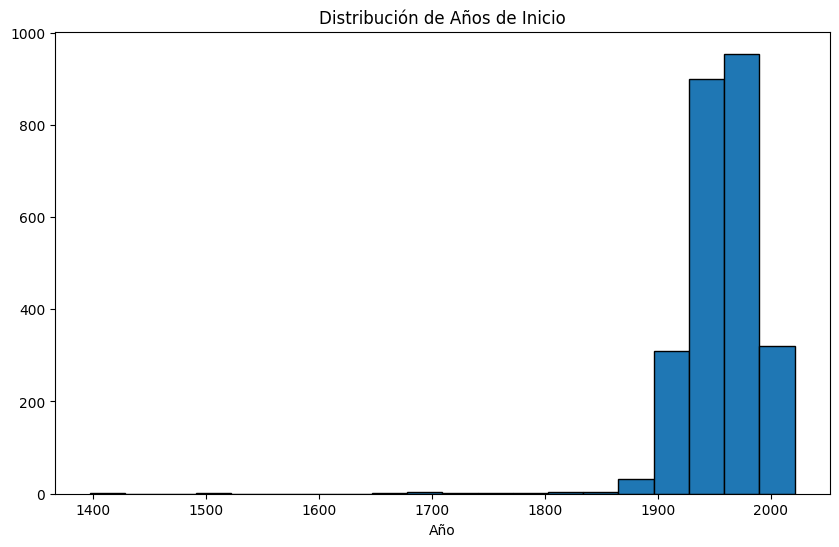

In [17]:
df['begin_year'] = pd.to_numeric(df['begin_date'].str[:4], errors='coerce')
plt.figure(figsize=(10, 6))
plt.hist(df['begin_year'].dropna(), bins=20, edgecolor='black')
plt.title('Distribución de Años de Inicio')
plt.xlabel('Año')
plt.show()

In [18]:
active_count = df['end_date'].value_counts()['Active']
print(f"Artistas activos: {active_count} ({active_count/2964*100:.2f}%)")

Artistas activos: 2143 (72.30%)


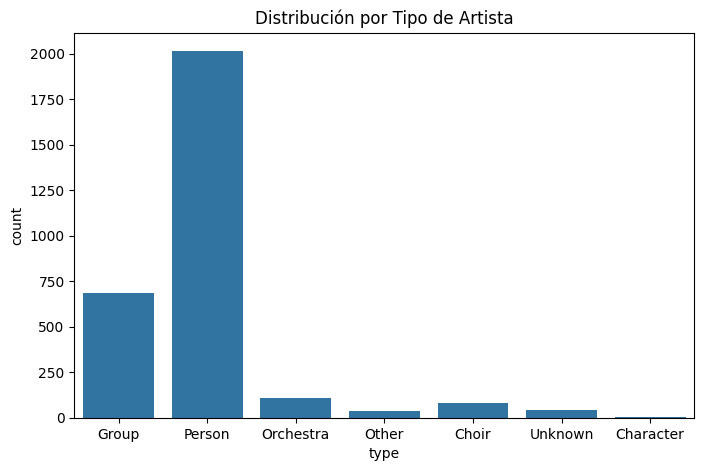

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Distribución por Tipo de Artista')
plt.show()

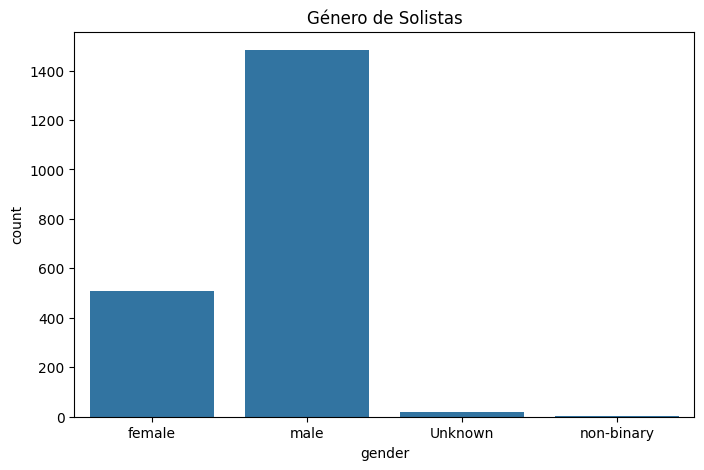

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df[df['type'] == 'Person'])
plt.title('Género de Solistas')
plt.show()

<Figure size 1200x800 with 0 Axes>

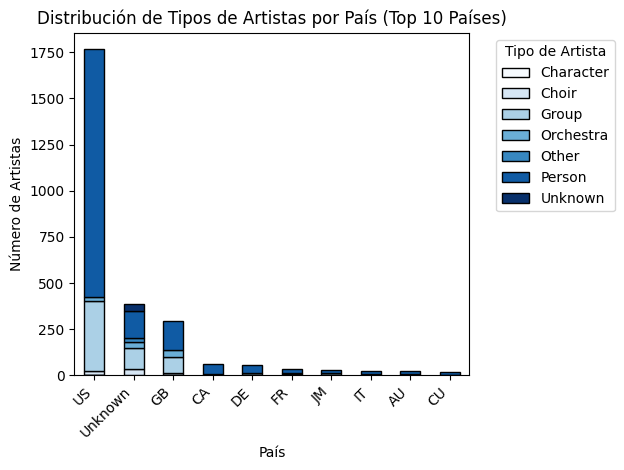

In [21]:
# Crear tabla cruzada con conteos (no normalizada para conteo absoluto)
cross_tab = pd.crosstab(df['country'], df['type'])

# Filtrar los 10 países con más artistas para mayor claridad
top_countries = cross_tab.sum(axis=1).nlargest(10).index
cross_tab_top = cross_tab.loc[top_countries]

# Graficar barras apiladas
plt.figure(figsize=(12, 8))
cross_tab_top.plot(kind='bar', stacked=True, colormap='Blues', edgecolor='black')
plt.title('Distribución de Tipos de Artistas por País (Top 10 Países)')
plt.xlabel('País')
plt.ylabel('Número de Artistas')
plt.legend(title='Tipo de Artista', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()